In [11]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!rm -rf /content/drive/*

^C


In [ ]:
from google.colab import drive
drive.flush_and_unmount()  # Unmount if already mounted
drive.mount('/content/drive')# Mount again

Mounted at /content/drive


In [ ]:
'''''import zipfile
import os

# Define the full path to your ZIP file on Google Drive
# Replace 'your_zip_file.zip' with the name of your file
zip_path = '/content/drive/My Drive/archive (4).zip'

# Define the destination folder where you want to extract the contents
# The folder will be created if it does not already exist
# Replace 'your_destination_folder' with your desired folder name
destination_path = '/content/drive/My Drive/Dataset Folder'

# Create the destination directory if it doesn't exist
os.makedirs(destination_path, exist_ok=True)

# Unzip the file
try:
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(destination_path)
    print(f"Successfully extracted {zip_path} to {destination_path}")
    print("\nContents of the extracted folder:")
    print(os.listdir(destination_path))
except FileNotFoundError:
    print(f"Error: The file '{zip_path}' was not found.")
except zipfile.BadZipFile:
    print(f"Error: The file '{zip_path}' is not a valid ZIP file.")
except Exception as e:
    print(f"An error occurred: {e}")
    }

SyntaxError: incomplete input (ipython-input-3322541599.py, line 1)

In [ ]:
import os
import shutil

from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# Config
input_dir = '/content/drive/MyDrive/Dataset Folder'
extracted_dir = '/content/drive/MyDrive/Dataset_Extracted'
classes = ['PD Patients', 'Non PD Patients']
valid_extensions = ('.png', '.jpg', '.jpeg')

# Remove old extracted folders if they exist
if os.path.exists(extracted_dir):
    shutil.rmtree(extracted_dir)

# Create new extracted folders for each class
for cls in classes:
    os.makedirs(os.path.join(extracted_dir, cls), exist_ok=True)

# Extract all images from nested subfolders to flat folders per class
for cls in classes:
    input_class_dir = os.path.join(input_dir, cls)
    output_class_dir = os.path.join(extracted_dir, cls)
    count = 0

    for root, dirs, files in os.walk(input_class_dir):
        for f in files:
            if f.lower().endswith(valid_extensions):
                src = os.path.join(root, f)
                dst = os.path.join(output_class_dir, f)

                # Handle filename conflicts by appending count
                if os.path.exists(dst):
                    base, ext = os.path.splitext(f)
                    dst = os.path.join(output_class_dir, f"{base}_{count}{ext}")

                shutil.copy2(src, dst)
                count += 1

    print(f"[INFO] Extracted {count} images for class {cls} to {output_class_dir}")

print("\n✅ Image extraction complete!")

Mounted at /content/drive
[INFO] Extracted 33296 images for class PD Patients to /content/drive/MyDrive/Dataset_Extracted/PD Patients
[INFO] Extracted 9624 images for class Non PD Patients to /content/drive/MyDrive/Dataset_Extracted/Non PD Patients

✅ Image extraction complete!


In [ ]:
import os
import cv2
import shutil
import random

from google.colab import drive
drive.mount('/content/drive')

# CONFIG
input_dir = '/content/drive/MyDrive/Dataset_Extracted'
output_dir = '/content/drive/MyDrive/Dataset_Clean'  # Output goes here
target_size = (128, 128)
max_images = 2000

# Clean output folder
if os.path.exists(output_dir):
    shutil.rmtree(output_dir)
os.makedirs(output_dir)

# Classes
classes = ['PD Patients', 'Non PD Patients']

for cls in classes:
    input_path = os.path.join(input_dir, cls)
    output_path = os.path.join(output_dir, cls)
    os.makedirs(output_path, exist_ok=True)

    # Collect all images
    all_images = [f for f in os.listdir(input_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

    # Shuffle and pick only max_images
    random.shuffle(all_images)
    selected_images = all_images[:max_images]

    print(f"[INFO] Processing {len(selected_images)} images for class {cls}...")

    count = 0
    for img_name in selected_images:
        img_path = os.path.join(input_path, img_name)
        img = cv2.imread(img_path)

        if img is None:
            continue  # Skip unreadable images

        # Resize
        img_resized = cv2.resize(img, target_size)

        # Save cleaned image
        save_path = os.path.join(output_path, img_name)
        cv2.imwrite(save_path, img_resized)
        count += 1

    print(f"[INFO] {cls} -> Saved {count} cleaned images to {output_path}")

print("\n✅ Dataset cleaning and resizing completed successfully!")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
[INFO] Processing 2000 images for class PD Patients...
[INFO] PD Patients -> Saved 2000 cleaned images to /content/drive/MyDrive/Dataset_Clean/PD Patients
[INFO] Processing 2000 images for class Non PD Patients...
[INFO] Non PD Patients -> Saved 2000 cleaned images to /content/drive/MyDrive/Dataset_Clean/Non PD Patients

✅ Dataset cleaning and resizing completed successfully!


In [ ]:
import os
import cv2
import numpy as np
import random
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Paths
base_dir = '/content/drive/MyDrive/Dataset_Clean'  # Cleaned dataset from previous step
augmented_dir = '/content/drive/MyDrive/Dataset_Augmented'
os.makedirs(augmented_dir, exist_ok=True)

# Categories (must match cleaned folder names exactly)
categories = ['PD Patients', 'Non PD Patients']

# Image size
img_size = (224, 224)

# Use only 5 augmentation features
selected_features = {
    "rotation": ImageDataGenerator(rotation_range=20),
    "width_shift": ImageDataGenerator(width_shift_range=0.1),
    "height_shift": ImageDataGenerator(height_shift_range=0.1),
    "zoom": ImageDataGenerator(zoom_range=0.2),
    "horizontal_flip": ImageDataGenerator(horizontal_flip=True)
}

# Counters
aug_count = {feature: 0 for feature in selected_features.keys()}
total_augmented = 0
MAX_IMAGES = 25000

# Count original images
original_images = []
for category in categories:
    input_path = os.path.join(base_dir, category)
    original_images.extend([os.path.join(input_path, f) for f in os.listdir(input_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))])

num_original = len(original_images)
print(f"📌 Original images found: {num_original}")

remaining_capacity = MAX_IMAGES - num_original
if remaining_capacity <= 0:
    print("Original images already exceed or meet max capacity. No augmentation applied.")
    import sys; sys.exit()

print(f"⚡ Total images to augment: {remaining_capacity}")

# Function to save augmented images
def save_augmented_images(generator, image, save_dir, base_filename, feature):
    global aug_count, total_augmented
    if total_augmented >= remaining_capacity:
        return
    for batch in generator.flow(np.expand_dims(image, 0), batch_size=1, save_to_dir=save_dir,
                                save_prefix=f"{base_filename}_{feature}", save_format="jpg"):
        aug_count[feature] += 1
        total_augmented += 1
        break

# Loop augmentation until limit reached
while total_augmented < remaining_capacity:
    for category in categories:
        input_path = os.path.join(base_dir, category)
        output_path = os.path.join(augmented_dir, category)
        os.makedirs(output_path, exist_ok=True)

        for img_name in os.listdir(input_path):
            if total_augmented >= remaining_capacity:
                break

            img_path = os.path.join(input_path, img_name)
            image = cv2.imread(img_path)
            if image is None:
                continue
            image = cv2.resize(image, img_size)

            # Randomly pick how many augmentation features to apply (1 to 5)
            num_features_to_apply = random.randint(1, len(selected_features))
            features_to_apply = random.sample(list(selected_features.keys()), num_features_to_apply)

            for feature in features_to_apply:
                if total_augmented >= remaining_capacity:
                    break
                save_augmented_images(selected_features[feature], image, output_path, img_name.split(".")[0], feature)

        if total_augmented >= remaining_capacity:
            break

# Final print
print("\n✅ Augmentation complete!")
print(f"📊 Total original images: {num_original}")
print(f"📊 Total augmented images: {total_augmented}")
print("Breakdown by feature:")
for feature, count in aug_count.items():
    print(f" - {feature}: {count} images")
print(f"📌 Grand total images (original + augmented): {num_original + total_augmented}")

📌 Original images found: 4000
⚡ Total images to augment: 21000

✅ Augmentation complete!
📊 Total original images: 4000
📊 Total augmented images: 21000
Breakdown by feature:
 - rotation: 4166 images
 - width_shift: 4173 images
 - height_shift: 4191 images
 - zoom: 4240 images
 - horizontal_flip: 4230 images
📌 Grand total images (original + augmented): 25000


In [ ]:
import os
import shutil
import random

from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# Original dataset directory (update if needed)
base_dir = '/content/drive/MyDrive/Dataset_Augmented'

# Output directories
output_dir = '/content/drive/MyDrive/Dataset_Splitted'
train_dir = os.path.join(output_dir, 'train')
val_dir = os.path.join(output_dir, 'val')
test_dir = os.path.join(output_dir, 'test')

# Create folders if they don't exist
for folder in [train_dir, val_dir, test_dir]:
    os.makedirs(folder, exist_ok=True)

# Train/Validation/Test split ratios
train_ratio = 0.7
val_ratio = 0.15
test_ratio = 0.15

# Loop through each class folder
for class_name in os.listdir(base_dir):
    class_path = os.path.join(base_dir, class_name)
    if not os.path.isdir(class_path):
        continue

    images = os.listdir(class_path)
    random.shuffle(images)

    total = len(images)
    train_end = int(total * train_ratio)
    val_end = train_end + int(total * val_ratio)

    train_files = images[:train_end]
    val_files = images[train_end:val_end]
    test_files = images[val_end:]

    # Create class folders inside train/val/test and copy files
    for split_dir, split_files in zip([train_dir, val_dir, test_dir],
                                      [train_files, val_files, test_files]):
        split_class_dir = os.path.join(split_dir, class_name)
        os.makedirs(split_class_dir, exist_ok=True)

        for img in split_files:
            src_path = os.path.join(class_path, img)
            dst_path = os.path.join(split_class_dir, img)
            shutil.copy(src_path, dst_path)

print("✅ Dataset split completed successfully!")

Mounted at /content/drive
✅ Dataset split completed successfully!


In [ ]:
import os

base_split_dir = '/content/drive/MyDrive/Dataset_Splitted'
splits = ['train', 'val', 'test']

print("📊 Dataset split details:")

for split in splits:
    split_dir = os.path.join(base_split_dir, split)
    print(f"\n-- {split.upper()} --")
    for class_name in os.listdir(split_dir):
        class_dir = os.path.join(split_dir, class_name)
        if os.path.isdir(class_dir):
            num_images = len([f for f in os.listdir(class_dir) if f.lower().endswith(('.png', '.jpg', '.jpeg'))])
            print(f"Class '{class_name}': {num_images} images")

📊 Dataset split details:

-- TRAIN --
Class 'PD Patients': 8461 images
Class 'Non PD Patients': 6237 images

-- VAL --
Class 'PD Patients': 1813 images
Class 'Non PD Patients': 1336 images

-- TEST --
Class 'PD Patients': 1814 images
Class 'Non PD Patients': 1337 images


/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


100%|██████████| 44.7M/44.7M [00:00<00:00, 231MB/s]


Loading checkpoint from /content/drive/MyDrive/best_resnet18.pth
Resuming at epoch 4 with best validation accuracy 97.1737


Epoch 5/15 - Validation: 100%|██████████| 99/99 [17:38<00:00, 10.69s/it]


Epoch 5/15, Train Loss: 0.0389, Train Acc: 98.63%, Val Loss: 0.1353, Val Acc: 95.05%
No improvement for 1 epochs.


Epoch 6/15 - Validation: 100%|██████████| 99/99 [03:30<00:00,  2.12s/it]


Epoch 6/15, Train Loss: 0.0405, Train Acc: 98.54%, Val Loss: 0.1810, Val Acc: 94.16%
No improvement for 2 epochs.


Epoch 7/15 - Validation: 100%|██████████| 99/99 [03:24<00:00,  2.06s/it]


Epoch 7/15, Train Loss: 0.0271, Train Acc: 99.06%, Val Loss: 0.0524, Val Acc: 98.22%
Checkpoint saved at epoch 7, best val_acc: 98.2217


Epoch 8/15 - Validation: 100%|██████████| 99/99 [03:26<00:00,  2.08s/it]


Epoch 8/15, Train Loss: 0.0290, Train Acc: 98.98%, Val Loss: 0.1619, Val Acc: 95.08%
No improvement for 1 epochs.


Epoch 9/15 - Validation: 100%|██████████| 99/99 [03:23<00:00,  2.05s/it]


Epoch 9/15, Train Loss: 0.0324, Train Acc: 98.97%, Val Loss: 0.0628, Val Acc: 97.65%
No improvement for 2 epochs.


Epoch 10/15 - Validation: 100%|██████████| 99/99 [03:23<00:00,  2.06s/it]


Epoch 10/15, Train Loss: 0.0346, Train Acc: 98.83%, Val Loss: 0.1401, Val Acc: 95.17%
No improvement for 3 epochs.


Epoch 11/15 - Validation: 100%|██████████| 99/99 [03:24<00:00,  2.06s/it]


Epoch 11/15, Train Loss: 0.0196, Train Acc: 99.37%, Val Loss: 0.0641, Val Acc: 97.62%
No improvement for 4 epochs.


Epoch 12/15 - Validation: 100%|██████████| 99/99 [03:22<00:00,  2.05s/it]


Epoch 12/15, Train Loss: 0.0324, Train Acc: 98.85%, Val Loss: 0.3700, Val Acc: 91.33%
No improvement for 5 epochs.


Epoch 13/15 - Validation: 100%|██████████| 99/99 [03:31<00:00,  2.13s/it]


Epoch 13/15, Train Loss: 0.0167, Train Acc: 99.46%, Val Loss: 0.0599, Val Acc: 98.00%
No improvement for 6 epochs.


Epoch 14/15 - Validation: 100%|██████████| 99/99 [03:24<00:00,  2.06s/it]


Epoch 14/15, Train Loss: 0.0218, Train Acc: 99.28%, Val Loss: 0.1399, Val Acc: 95.05%
No improvement for 7 epochs.
Early stopping triggered.

Training history:
   Epoch  Train Loss  Train Acc (%)  Val Loss  Val Acc (%)
0      5    0.038929      98.626955  0.135325    95.046046
1      6    0.040519      98.544983  0.181006    94.156875
2      7    0.027089      99.064144  0.052393    98.221658
3      8    0.028975      98.975340  0.161857    95.077802
4      9    0.032392      98.968509  0.062802    97.650048
5     10    0.034648      98.831887  0.140070    95.173071
6     11    0.019640      99.371542  0.064089    97.618292
7     12    0.032446      98.845550  0.370032    91.330581
8     13    0.016687      99.460346  0.059886    97.999365
9     14    0.021828      99.282738  0.139920    95.046046


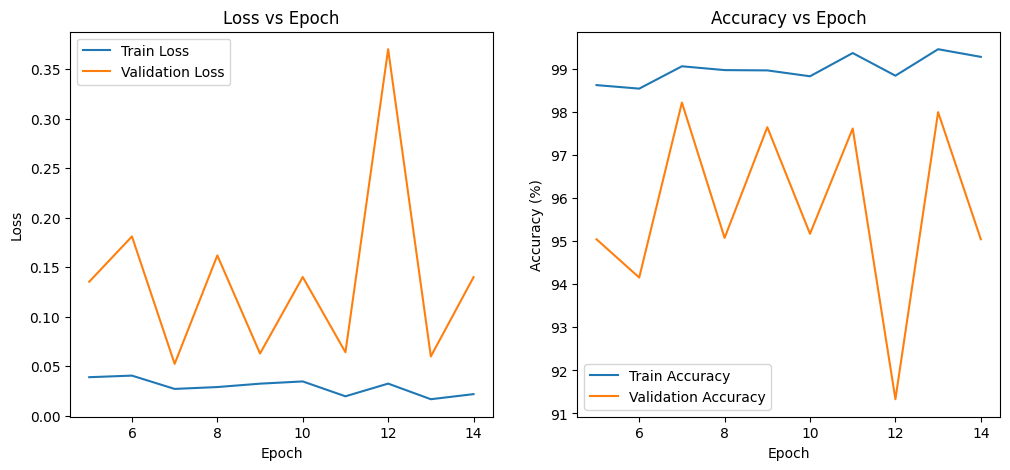

Testing: 100%|██████████| 99/99 [19:54<00:00, 12.07s/it]


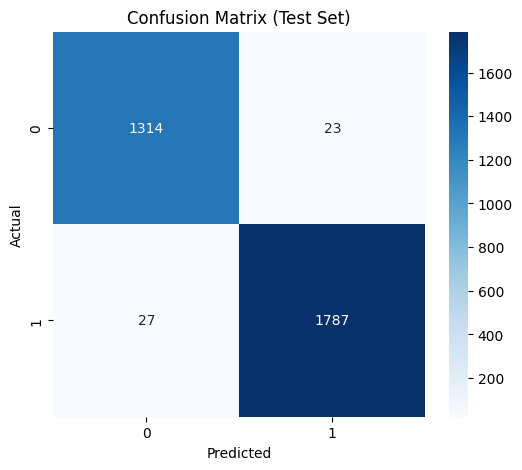

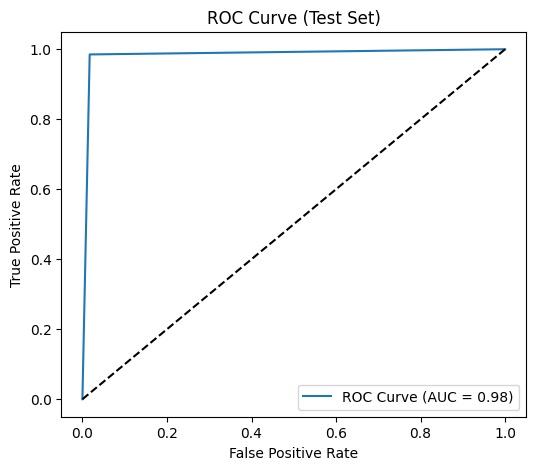

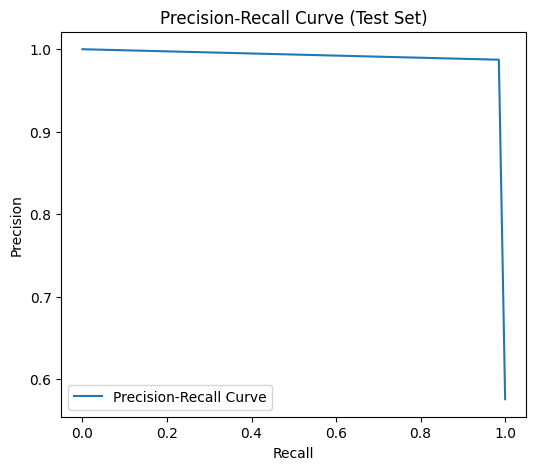

Training complete and best model saved at: /content/drive/MyDrive/best_resnet18.pth


In [ ]:
import os
import cv2
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models, transforms
from torch.utils.data import DataLoader, Dataset
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_recall_curve

# Ensure deterministic behavior for reproducibility (optional)
SEED = 42
torch.manual_seed(SEED)
torch.cuda.manual_seed_all(SEED)
np.random.seed(SEED)
import random
random.seed(SEED)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

# Device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Dataset
class ParkinsonDataset(Dataset):
    def __init__(self, image_paths, labels, transform=None):
        self.image_paths = image_paths
        self.labels = labels
        self.transform = transform

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        img_path = self.image_paths[idx]
        image = cv2.imread(img_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        if self.transform:
            image = self.transform(image)
        label = self.labels[idx]
        return image, torch.tensor(label, dtype=torch.float32)

# Transforms
transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

# Data loader helper
def get_image_paths_and_labels(base_dir, split):
    image_paths, labels = [], []
    class_map = {'Non PD Patients': 0, 'PD Patients': 1}
    split_folder = os.path.join(base_dir, split)
    for class_name, label in class_map.items():
        class_dir = os.path.join(split_folder, class_name)
        for img_name in os.listdir(class_dir):
            if img_name.lower().endswith(('.jpg', '.jpeg', '.png')):
                image_paths.append(os.path.join(class_dir, img_name))
                labels.append(label)
    return image_paths, labels

# Paths
base_dir = '/content/drive/MyDrive/Dataset_Splitted'
checkpoint_path = '/content/drive/MyDrive/best_resnet18.pth'

train_image_paths, train_labels = get_image_paths_and_labels(base_dir, 'train')
val_image_paths, val_labels = get_image_paths_and_labels(base_dir, 'val')
test_image_paths, test_labels = get_image_paths_and_labels(base_dir, 'test')

train_dataset = ParkinsonDataset(train_image_paths, train_labels, transform=transform)
val_dataset = ParkinsonDataset(val_image_paths, val_labels, transform=transform)
test_dataset = ParkinsonDataset(test_image_paths, test_labels, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Load ResNet18 pretrained and modify classifier
model = models.resnet18(pretrained=True)
num_features = model.fc.in_features
model.fc = nn.Sequential(
    nn.Linear(num_features, 1),
    nn.Sigmoid()
)
model = model.to(device)

criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4)

# Early stopping class -- now tracks best validation accuracy
class EarlyStopping:
    def __init__(self, patience=7, verbose=True):
        self.patience = patience
        self.verbose = verbose
        self.counter = 0
        self.best_acc = 0
        self.early_stop = False

    def __call__(self, val_acc):
        if val_acc > self.best_acc:
            self.best_acc = val_acc
            self.counter = 0
            if self.verbose:
                print(f"Validation accuracy improved to {val_acc:.4f}.")
        else:
            self.counter += 1
            if self.verbose:
                print(f"No improvement for {self.counter} epochs.")
            if self.counter >= self.patience:
                self.early_stop = True

# Resume functionality
start_epoch = 0
early_stopping = EarlyStopping(patience=7, verbose=True)
best_val_acc = 0.0

if os.path.exists(checkpoint_path):
    print(f"Loading checkpoint from {checkpoint_path}")
    checkpoint = torch.load(checkpoint_path, map_location=device)
    model.load_state_dict(checkpoint['model_state_dict'])
    optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
    best_val_acc = checkpoint.get('best_val_acc', 0.0)
    start_epoch = checkpoint.get('epoch', 0) + 1
    early_stopping.best_acc = best_val_acc
    print(f"Resuming at epoch {start_epoch} with best validation accuracy {best_val_acc:.4f}")
else:
    print("No checkpoint found. Training from scratch.")

num_epochs = 15  # You can change as needed
history = []

for epoch in range(start_epoch, num_epochs):
    model.train()
    running_loss, correct, total = 0., 0, 0

    for images, labels in tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs} - Training"):
        images, labels = images.to(device), labels.to(device)
        labels = labels.unsqueeze(1)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * images.size(0)
        preds = (outputs >= 0.5).float()
        correct += (preds == labels).sum().item()
        total += labels.size(0)

    train_loss = running_loss / total
    train_acc = 100 * correct / total

    model.eval()
    val_loss, val_correct, val_total = 0., 0, 0

    with torch.no_grad():
        for images, labels in tqdm(val_loader, desc=f"Epoch {epoch+1}/{num_epochs} - Validation"):
            images, labels = images.to(device), labels.to(device)
            labels = labels.unsqueeze(1)

            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item() * images.size(0)
            preds = (outputs >= 0.5).float()
            val_correct += (preds == labels).sum().item()
            val_total += labels.size(0)

    val_loss /= val_total
    val_acc = 100 * val_correct / val_total

    print(f'Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.2f}%, Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.2f}%')

    history.append([epoch+1, train_loss, train_acc, val_loss, val_acc])

    # Save checkpoint if validation improved
    if val_acc > best_val_acc:
        best_val_acc = val_acc
        torch.save({
            'epoch': epoch,
            'model_state_dict': model.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            'best_val_acc': best_val_acc,
        }, checkpoint_path)
        print(f"Checkpoint saved at epoch {epoch+1}, best val_acc: {best_val_acc:.4f}")
        early_stopping.counter = 0
    else:
        early_stopping.counter += 1
        print(f"No improvement for {early_stopping.counter} epochs.")
        if early_stopping.counter >= early_stopping.patience:
            print("Early stopping triggered.")
            break

# After training, always load the best checkpoint
model.load_state_dict(torch.load(checkpoint_path, map_location=device)['model_state_dict'])

# Plot training history
import pandas as pd
df_history = pd.DataFrame(history, columns=['Epoch', 'Train Loss', 'Train Acc (%)', 'Val Loss', 'Val Acc (%)'])
print("\nTraining history:")
print(df_history)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(df_history['Epoch'], df_history['Train Loss'], label='Train Loss')
plt.plot(df_history['Epoch'], df_history['Val Loss'], label='Validation Loss')
plt.title('Loss vs Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(df_history['Epoch'], df_history['Train Acc (%)'], label='Train Accuracy')
plt.plot(df_history['Epoch'], df_history['Val Acc (%)'], label='Validation Accuracy')
plt.title('Accuracy vs Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.show()

# Test evaluation
model.eval()
all_labels, all_preds = [], []
with torch.no_grad():
    for images, labels in tqdm(test_loader, desc='Testing'):
        images, labels = images.to(device), labels.to(device)
        labels = labels.unsqueeze(1)
        outputs = model(images)
        preds = (outputs >= 0.5).float()
        all_labels.extend(labels.cpu().numpy())
        all_preds.extend(preds.cpu().numpy())

conf_matrix = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(6,5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (Test Set)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

fpr, tpr, _ = roc_curve(all_labels, all_preds)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve (Test Set)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

precision, recall, _ = precision_recall_curve(all_labels, all_preds)
plt.figure(figsize=(6,5))
plt.plot(recall, precision, label='Precision-Recall Curve')
plt.title('Precision-Recall Curve (Test Set)')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()

print("Training complete and best model saved at:", checkpoint_path)




Downloading: "https://download.pytorch.org/models/efficientnet_b0_rwightman-7f5810bc.pth" to /root/.cache/torch/hub/checkpoints/efficientnet_b0_rwightman-7f5810bc.pth


100%|██████████| 20.5M/20.5M [00:00<00:00, 138MB/s] 


Loading checkpoint from /content/drive/MyDrive/best_efficientnet_b0.pth
Resuming at epoch 3 with best validation accuracy 94.1886


Epoch 4/15 - Validation: 100%|██████████| 99/99 [18:40<00:00, 11.32s/it]


Epoch 4/15, Train Loss: 0.0406, Train Acc: 98.64%, Val Loss: 0.0858, Val Acc: 97.40%
Checkpoint saved at epoch 4, best val_acc: 97.3960


Epoch 5/15 - Validation: 100%|██████████| 99/99 [01:48<00:00,  1.10s/it]


Epoch 5/15, Train Loss: 0.0201, Train Acc: 99.36%, Val Loss: 0.1166, Val Acc: 96.03%
No improvement for 1 epochs.


Epoch 6/15 - Validation: 100%|██████████| 99/99 [02:00<00:00,  1.22s/it]


Epoch 6/15, Train Loss: 0.0237, Train Acc: 99.13%, Val Loss: 0.1550, Val Acc: 95.05%
No improvement for 2 epochs.


Epoch 7/15 - Validation: 100%|██████████| 99/99 [01:46<00:00,  1.07s/it]


Epoch 7/15, Train Loss: 0.0737, Train Acc: 97.50%, Val Loss: 0.0672, Val Acc: 98.13%
Checkpoint saved at epoch 7, best val_acc: 98.1264


Epoch 8/15 - Validation: 100%|██████████| 99/99 [01:46<00:00,  1.07s/it]


Epoch 8/15, Train Loss: 0.0390, Train Acc: 98.63%, Val Loss: 0.0791, Val Acc: 97.43%
No improvement for 1 epochs.


Epoch 9/15 - Validation: 100%|██████████| 99/99 [01:48<00:00,  1.09s/it]


Epoch 9/15, Train Loss: 0.0391, Train Acc: 98.59%, Val Loss: 0.0874, Val Acc: 98.00%
No improvement for 2 epochs.


Epoch 10/15 - Validation: 100%|██████████| 99/99 [01:48<00:00,  1.09s/it]


Epoch 10/15, Train Loss: 0.0287, Train Acc: 99.02%, Val Loss: 0.0442, Val Acc: 98.70%
Checkpoint saved at epoch 10, best val_acc: 98.6980


Epoch 11/15 - Validation: 100%|██████████| 99/99 [01:48<00:00,  1.09s/it]


Epoch 11/15, Train Loss: 0.0296, Train Acc: 98.97%, Val Loss: 0.0517, Val Acc: 98.67%
No improvement for 1 epochs.


Epoch 12/15 - Validation: 100%|██████████| 99/99 [01:47<00:00,  1.09s/it]


Epoch 12/15, Train Loss: 0.0237, Train Acc: 99.19%, Val Loss: 0.0744, Val Acc: 98.35%
No improvement for 2 epochs.


Epoch 13/15 - Validation: 100%|██████████| 99/99 [01:47<00:00,  1.09s/it]


Epoch 13/15, Train Loss: 0.0228, Train Acc: 99.24%, Val Loss: 0.0455, Val Acc: 98.44%
No improvement for 3 epochs.


Epoch 14/15 - Validation: 100%|██████████| 99/99 [01:59<00:00,  1.21s/it]


Epoch 14/15, Train Loss: 0.0259, Train Acc: 99.06%, Val Loss: 0.0677, Val Acc: 98.76%
Checkpoint saved at epoch 14, best val_acc: 98.7615


Epoch 15/15 - Validation: 100%|██████████| 99/99 [01:46<00:00,  1.08s/it]


Epoch 15/15, Train Loss: 0.0254, Train Acc: 99.13%, Val Loss: 0.0795, Val Acc: 97.24%
No improvement for 1 epochs.

Training history:
    Epoch  Train Loss  Train Acc (%)  Val Loss  Val Acc (%)
0       4    0.040644      98.640618  0.085814    97.395999
1       5    0.020093      99.364711  0.116555    96.030486
2       6    0.023654      99.125623  0.155049    95.046046
3       7    0.073652      97.499829  0.067198    98.126389
4       8    0.039029      98.626955  0.079100    97.427755
5       9    0.039092      98.592800  0.087358    97.999365
6      10    0.028720      99.016326  0.044168    98.697999
7      11    0.029614      98.968509  0.051715    98.666243
8      12    0.023700      99.193934  0.074378    98.348682
9      13    0.022807      99.241751  0.045470    98.443950
10     14    0.025868      99.064144  0.067741    98.761512
11     15    0.025380      99.132454  0.079530    97.237218


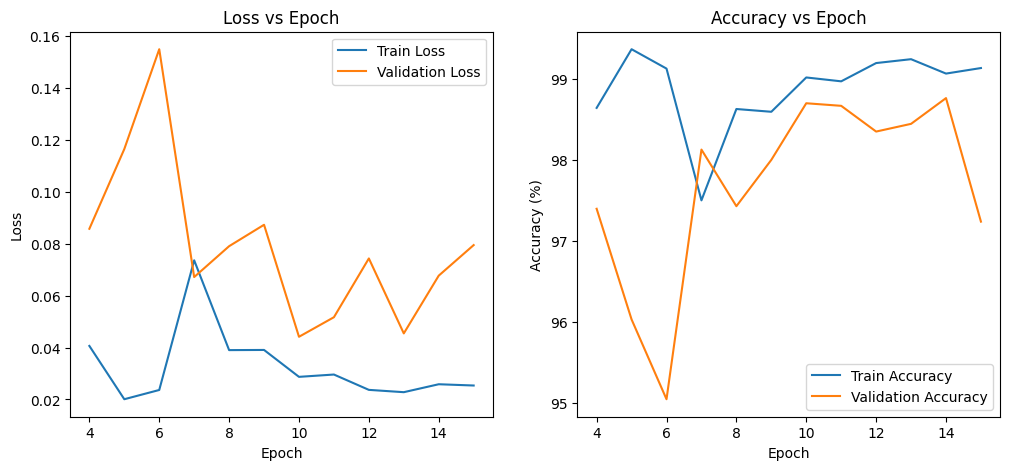

Testing: 100%|██████████| 99/99 [19:35<00:00, 11.88s/it]


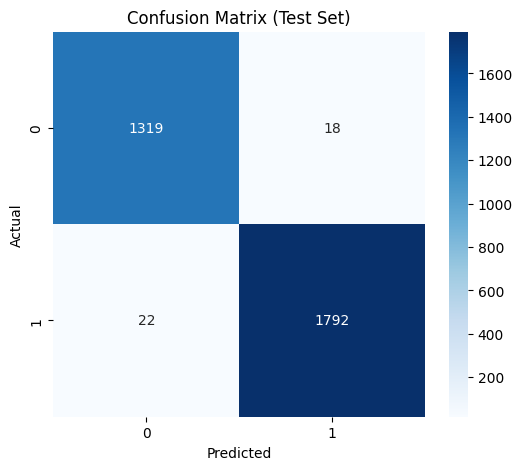

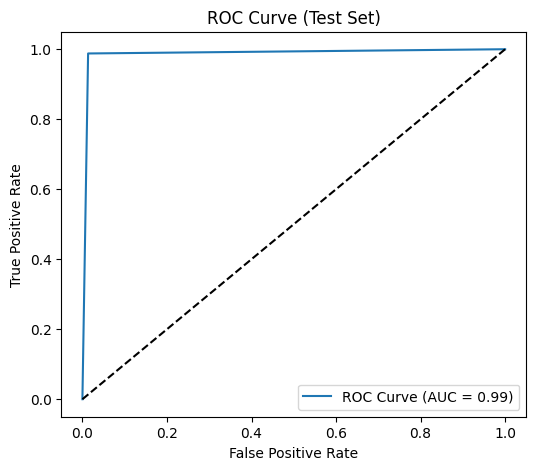

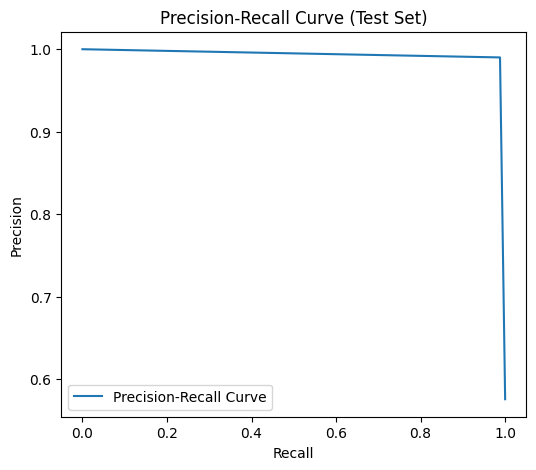

Training complete and best model saved at: /content/drive/MyDrive/best_efficientnet_b0.pth


In [ ]:
import os
import cv2
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models, transforms
from torch.utils.data import DataLoader, Dataset
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_recall_curve


# Ensure deterministic behavior for reproducibility (optional)
SEED = 42
torch.manual_seed(SEED)
torch.cuda.manual_seed_all(SEED)
np.random.seed(SEED)
import random
random.seed(SEED)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False


# Device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


# Dataset
class ParkinsonDataset(Dataset):
    def __init__(self, image_paths, labels, transform=None):
        self.image_paths = image_paths
        self.labels = labels
        self.transform = transform


    def __len__(self):
        return len(self.image_paths)


    def __getitem__(self, idx):
        img_path = self.image_paths[idx]
        image = cv2.imread(img_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        if self.transform:
            image = self.transform(image)
        label = self.labels[idx]
        return image, torch.tensor(label, dtype=torch.float32)


# Transforms
transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])


# Data loader helper
def get_image_paths_and_labels(base_dir, split):
    image_paths, labels = [], []
    class_map = {'Non PD Patients': 0, 'PD Patients': 1}
    split_folder = os.path.join(base_dir, split)
    for class_name, label in class_map.items():
        class_dir = os.path.join(split_folder, class_name)
        for img_name in os.listdir(class_dir):
            if img_name.lower().endswith(('.jpg', '.jpeg', '.png')):
                image_paths.append(os.path.join(class_dir, img_name))
                labels.append(label)
    return image_paths, labels


# Paths
base_dir = '/content/drive/MyDrive/Dataset_Splitted'
checkpoint_path = '/content/drive/MyDrive/best_efficientnet_b0.pth'


train_image_paths, train_labels = get_image_paths_and_labels(base_dir, 'train')
val_image_paths, val_labels = get_image_paths_and_labels(base_dir, 'val')
test_image_paths, test_labels = get_image_paths_and_labels(base_dir, 'test')


train_dataset = ParkinsonDataset(train_image_paths, train_labels, transform=transform)
val_dataset = ParkinsonDataset(val_image_paths, val_labels, transform=transform)
test_dataset = ParkinsonDataset(test_image_paths, test_labels, transform=transform)


train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)


# Load EfficientNet-B0 pretrained and modify classifier
from torchvision.models import efficientnet_b0, EfficientNet_B0_Weights

model = efficientnet_b0(weights=EfficientNet_B0_Weights.IMAGENET1K_V1)
num_features = model.classifier[1].in_features
model.classifier[1] = nn.Sequential(
    nn.Linear(num_features, 1),
    nn.Sigmoid()
)
model = model.to(device)


criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4)


# Early stopping class -- now tracks best validation accuracy
class EarlyStopping:
    def __init__(self, patience=7, verbose=True):
        self.patience = patience
        self.verbose = verbose
        self.counter = 0
        self.best_acc = 0
        self.early_stop = False


    def __call__(self, val_acc):
        if val_acc > self.best_acc:
            self.best_acc = val_acc
            self.counter = 0
            if self.verbose:
                print(f"Validation accuracy improved to {val_acc:.4f}.")
        else:
            self.counter += 1
            if self.verbose:
                print(f"No improvement for {self.counter} epochs.")
            if self.counter >= self.patience:
                self.early_stop = True


# Resume functionality
start_epoch = 0
early_stopping = EarlyStopping(patience=7, verbose=True)
best_val_acc = 0.0


if os.path.exists(checkpoint_path):
    print(f"Loading checkpoint from {checkpoint_path}")
    checkpoint = torch.load(checkpoint_path, map_location=device)
    model.load_state_dict(checkpoint['model_state_dict'])
    optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
    best_val_acc = checkpoint.get('best_val_acc', 0.0)
    start_epoch = checkpoint.get('epoch', 0) + 1
    early_stopping.best_acc = best_val_acc
    print(f"Resuming at epoch {start_epoch} with best validation accuracy {best_val_acc:.4f}")
else:
    print("No checkpoint found. Training from scratch.")


num_epochs = 15  # You can change as needed
history = []


for epoch in range(start_epoch, num_epochs):
    model.train()
    running_loss, correct, total = 0., 0, 0


    for images, labels in tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs} - Training"):
        images, labels = images.to(device), labels.to(device)
        labels = labels.unsqueeze(1)


        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()


        running_loss += loss.item() * images.size(0)
        preds = (outputs >= 0.5).float()
        correct += (preds == labels).sum().item()
        total += labels.size(0)


    train_loss = running_loss / total
    train_acc = 100 * correct / total


    model.eval()
    val_loss, val_correct, val_total = 0., 0, 0


    with torch.no_grad():
        for images, labels in tqdm(val_loader, desc=f"Epoch {epoch+1}/{num_epochs} - Validation"):
            images, labels = images.to(device), labels.to(device)
            labels = labels.unsqueeze(1)


            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item() * images.size(0)
            preds = (outputs >= 0.5).float()
            val_correct += (preds == labels).sum().item()
            val_total += labels.size(0)


    val_loss /= val_total
    val_acc = 100 * val_correct / val_total


    print(f'Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.2f}%, Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.2f}%')


    history.append([epoch+1, train_loss, train_acc, val_loss, val_acc])


    # Save checkpoint if validation improved
    if val_acc > best_val_acc:
        best_val_acc = val_acc
        torch.save({
            'epoch': epoch,
            'model_state_dict': model.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            'best_val_acc': best_val_acc,
        }, checkpoint_path)
        print(f"Checkpoint saved at epoch {epoch+1}, best val_acc: {best_val_acc:.4f}")
        early_stopping.counter = 0
    else:
        early_stopping.counter += 1
        print(f"No improvement for {early_stopping.counter} epochs.")
        if early_stopping.counter >= early_stopping.patience:
            print("Early stopping triggered.")
            break


# After training, always load the best checkpoint
model.load_state_dict(torch.load(checkpoint_path, map_location=device)['model_state_dict'])


# Plot training history
import pandas as pd
df_history = pd.DataFrame(history, columns=['Epoch', 'Train Loss', 'Train Acc (%)', 'Val Loss', 'Val Acc (%)'])
print("\nTraining history:")
print(df_history)


plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(df_history['Epoch'], df_history['Train Loss'], label='Train Loss')
plt.plot(df_history['Epoch'], df_history['Val Loss'], label='Validation Loss')
plt.title('Loss vs Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(df_history['Epoch'], df_history['Train Acc (%)'], label='Train Accuracy')
plt.plot(df_history['Epoch'], df_history['Val Acc (%)'], label='Validation Accuracy')
plt.title('Accuracy vs Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.show()


# Test evaluation
model.eval()
all_labels, all_preds = [], []
with torch.no_grad():
    for images, labels in tqdm(test_loader, desc='Testing'):
        images, labels = images.to(device), labels.to(device)
        labels = labels.unsqueeze(1)
        outputs = model(images)
        preds = (outputs >= 0.5).float()
        all_labels.extend(labels.cpu().numpy())
        all_preds.extend(preds.cpu().numpy())


conf_matrix = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(6,5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (Test Set)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


fpr, tpr, _ = roc_curve(all_labels, all_preds)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve (Test Set)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


precision, recall, _ = precision_recall_curve(all_labels, all_preds)
plt.figure(figsize=(6,5))
plt.plot(recall, precision, label='Precision-Recall Curve')
plt.title('Precision-Recall Curve (Test Set)')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()


print("Training complete and best model saved at:", checkpoint_path)


In [ ]:
import torch
import torch.nn as nn
from torchvision import models, transforms
from PIL import Image

# Load the pretrained EfficientNet weights enum
weights = models.EfficientNet_B0_Weights.IMAGENET1K_V1

# Load EfficientNet-B0 and modify classifier for binary output
model = models.efficientnet_b0(weights=weights)
num_features = model.classifier[1].in_features
model.classifier[1] = nn.Sequential(
    nn.Linear(num_features, 1),
    nn.Sigmoid()
)

# Load checkpoint weights properly
checkpoint_path = "/content/drive/MyDrive/best_efficientnet_b0.pth"
checkpoint = torch.load(checkpoint_path, map_location=torch.device('cpu'))
model.load_state_dict(checkpoint['model_state_dict'])
model.eval()

# Use the full preprocessing pipeline from pretrained weights
transform = weights.transforms()

def preprocess_image(image_path):
    image = Image.open(image_path).convert("RGB")
    image = transform(image).unsqueeze(0)
    return image

def predict_image(image_path):
    image_tensor = preprocess_image(image_path)
    with torch.no_grad():
        output = model(image_tensor)
        prob = output.item()
        predicted_class = 1 if prob >= 0.5 else 0
        class_name = "PD Patient" if predicted_class == 1 else "Non-PD Patient"
        return class_name, prob

test_image_path = r'/content/drive/MyDrive/Dataset_Splitted/test/PD Patients/001_17923_height_shift_0_6180.jpg'
class_name, probability = predict_image(test_image_path)

print(f"Prediction: {class_name}")
print(f"Probability of PD: {probability:.4f}")


Prediction: PD Patient
Probability of PD: 1.0000


In [ ]:
import torch
from torchvision import models
from PIL import Image
import ipywidgets as widgets
from IPython.display import display
import io

# Load model setup (same as before)
weights = models.EfficientNet_B0_Weights.IMAGENET1K_V1
model = models.efficientnet_b0(weights=weights)
num_features = model.classifier[1].in_features
model.classifier[1] = torch.nn.Sequential(
    torch.nn.Linear(num_features, 1),
    torch.nn.Sigmoid()
)
checkpoint_path = "/content/drive/MyDrive/best_efficientnet_b0.pth"
checkpoint = torch.load(checkpoint_path, map_location=torch.device('cpu'))
model.load_state_dict(checkpoint['model_state_dict'])
model.eval()
transform = weights.transforms()

def preprocess_image(image):
    image = image.convert("RGB")
    image = transform(image).unsqueeze(0)
    return image

def predict_pil_image(image):
    image_tensor = preprocess_image(image)
    with torch.no_grad():
        output = model(image_tensor)
        prob = output.item()
        predicted_class = 1 if prob >= 0.5 else 0
        class_name = "PD Patient" if predicted_class == 1 else "Non-PD Patient"
        return class_name, prob

# Create upload widget
uploader = widgets.FileUpload(accept='image/*', multiple=False)
display(uploader)

def on_upload_change(change):
    # ipywidgets v8+: .value is a tuple of dicts with file info
    # ipywidgets v7: .value is a dict with filename keys
    file_contents = None
    if isinstance(uploader.value, tuple):
        if len(uploader.value) > 0:
            file_contents = uploader.value[0]['content']
    elif isinstance(uploader.value, dict):
        # v7 compatibility
        if len(uploader.value) > 0:
            file_contents = next(iter(uploader.value.values()))['content']

    if file_contents is not None:
        image = Image.open(io.BytesIO(file_contents))
        class_name, probability = predict_pil_image(image)
        print(f"Prediction: {class_name}")
        print(f"Probability of PD: {probability:.4f}")

uploader.observe(on_upload_change, names='value')


FileUpload(value={}, accept='image/*', description='Upload')

Prediction: PD Patient
Probability of PD: 1.0000
Prediction: Non-PD Patient
Probability of PD: 0.0000
Prediction: PD Patient
Probability of PD: 1.0000


In [ ]:
import os
import cv2
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from torchvision import models
from PIL import Image
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Dataset for Parkinson's data
class ParkinsonDataset(Dataset):
    def __init__(self, image_paths, labels, transform=None):
        self.image_paths = image_paths
        self.labels = labels
        self.transform = transform

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        img = cv2.imread(self.image_paths[idx])
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = Image.fromarray(img)
        if self.transform:
            img = self.transform(img)
        label = self.labels[idx]
        return img, label

def get_image_paths_and_labels(base_dir, class_map):
    paths, labels = [], []
    for cls_name, cls_label in class_map.items():
        folder = os.path.join(base_dir, cls_name)
        for f in os.listdir(folder):
            if f.lower().endswith(('.jpg', '.png', '.jpeg')):
                paths.append(os.path.join(folder, f))
                labels.append(cls_label)
    return paths, labels

def evaluate_model(model, weights, test_paths, test_labels, batch_size=32):
    transform = weights.transforms()
    dataset = ParkinsonDataset(test_paths, test_labels, transform=transform)
    loader = DataLoader(dataset, batch_size=batch_size, shuffle=False)

    model.eval()
    all_preds, all_labels = [], []

    with torch.no_grad():
        for imgs, labels in loader:
            imgs = imgs.to(device)
            outputs = model(imgs)
            preds = (outputs >= 0.5).long().cpu()
            all_preds.extend(preds.squeeze().tolist())
            all_labels.extend(labels.tolist())

    acc = accuracy_score(all_labels, all_preds)
    prec = precision_score(all_labels, all_preds)
    rec = recall_score(all_labels, all_preds)
    f1 = f1_score(all_labels, all_preds)
    cm = confusion_matrix(all_labels, all_preds)

    print(f"Accuracy: {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall: {rec:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"Confusion Matrix:\n{cm}")

# Dataset directory and class labels
test_dir = "/content/drive/MyDrive/Dataset_Splitted/test"
class_map = {'Non PD Patients': 0, 'PD Patients': 1}
test_paths, test_labels = get_image_paths_and_labels(test_dir, class_map)

# ResNet18 setup
print("Evaluating ResNet18 model:")
resnet_weights = models.ResNet18_Weights.IMAGENET1K_V1
model_resnet = models.resnet18(weights=resnet_weights)
num_features = model_resnet.fc.in_features
model_resnet.fc = nn.Sequential(
    nn.Linear(num_features, 1),
    nn.Sigmoid()
)
resnet_checkpoint = torch.load("/content/drive/MyDrive/best_resnet18.pth", map_location=device)
model_resnet.load_state_dict(resnet_checkpoint['model_state_dict'])  # extract model's weights from checkpoint dict
model_resnet = model_resnet.to(device)

evaluate_model(model_resnet, resnet_weights, test_paths, test_labels)

# EfficientNet-B0 setup
print("\nEvaluating EfficientNet-B0 model:")
effnet_weights = models.EfficientNet_B0_Weights.IMAGENET1K_V1
model_effnet = models.efficientnet_b0(weights=effnet_weights)
num_features = model_effnet.classifier[1].in_features
model_effnet.classifier[1] = nn.Sequential(
    nn.Linear(num_features, 1),
    nn.Sigmoid()
)
effnet_checkpoint = torch.load("/content/drive/MyDrive/best_efficientnet_b0.pth", map_location=device)
model_effnet.load_state_dict(effnet_checkpoint['model_state_dict'])  # extract model's weights from checkpoint dict
model_effnet = model_effnet.to(device)

evaluate_model(model_effnet, effnet_weights, test_paths, test_labels)


Evaluating ResNet18 model:
Accuracy: 0.9480
Precision: 0.9630
Recall: 0.9460
F1 Score: 0.9544
Confusion Matrix:
[[1271   66]
 [  98 1716]]

Evaluating EfficientNet-B0 model:
Accuracy: 0.9714
Precision: 0.9624
Recall: 0.9890
F1 Score: 0.9755
Confusion Matrix:
[[1267   70]
 [  20 1794]]


In [29]:
!pip install streamlit

In [31]:
%%writefile app.py
import streamlit as st
import torch
from torchvision import models
from PIL import Image
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Set up the device for model inference
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Use Streamlit's cache_resource to load the model only once
@st.cache_resource(show_spinner=False)
def load_model(checkpoint_path):
    """
    Loads and configures a pre-trained EfficientNet-B0 model.
    """
    # Initialize the EfficientNet-B0 model with pre-trained weights
    weights = models.EfficientNet_B0_Weights.IMAGENET1K_V1
    model = models.efficientnet_b0(weights=weights)

    # Modify the final classifier layer for a single output
    # The input features for the final linear layer are accessed via model.classifier[1].in_features
    num_features = model.classifier[1].in_features
    model.classifier[1] = torch.nn.Sequential(
        torch.nn.Linear(num_features, 1),
        torch.nn.Sigmoid()
    )

    # Load the trained model checkpoint from the specified path
    checkpoint = torch.load(checkpoint_path, map_location=device)
    model.load_state_dict(checkpoint['model_state_dict'])
    model.to(device)
    model.eval() # Set the model to evaluation mode
    return model, weights

def preprocess_image(img):
    """
    Prepares the image for model inference by converting it to RGB format.
    """
    # Handle different image channel formats (grayscale, single-channel, BGR)
    if len(img.shape) == 2:  # Grayscale
        img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
    elif img.shape[2] == 1: # Single-channel
        img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
    else: # BGR (typical for OpenCV)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Convert the processed image array to a PIL Image
    pil_img = Image.fromarray(img)
    return pil_img

def predict(model, transform, image):
    """
    Performs a prediction on the preprocessed image using the loaded model.
    """
    # Apply the appropriate transforms for the EfficientNet model
    input_tensor = transform(image).unsqueeze(0).to(device)
    with torch.no_grad():
        output = model(input_tensor)
        prob = output.item()
        pred = "PD Patient" if prob >= 0.5 else "Non PD Patient"
    return pred, prob

def plot_confidence_pie(prob):
    """
    Generates and displays a pie chart showing the confidence score.
    """
    labels = ['PD Patient', 'Non PD Patient']
    sizes = [prob, 1 - prob]
    colors = ['#ff9999', '#66b3ff']
    explode = (0.05, 0)
    fig, ax = plt.subplots()
    ax.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
           startangle=90, shadow=True)
    ax.axis('equal') # Ensures the pie chart is circular
    st.pyplot(fig)

CAUSES = """
- Genetic mutations increasing Parkinson's risk.
- Exposure to environmental toxins such as pesticides.
- Aging-related degeneration of dopamine-producing neurons.
"""

RECOMMENDATIONS = """
- Regular exercise to improve mobility and balance.
- Medication adherence as prescribed by neurologist.
- Healthy diet rich in fiber and antioxidants.
- Support therapies: physical, occupational, speech.
- Regular medical follow-ups for symptom management.
"""

NON_PD_INFO = """
- Your MRI scan shows no indication of Parkinson’s disease.
- Maintain a healthy lifestyle with balanced diet and regular exercise.
- Regular health check-ups can aid early detection of any conditions.
- Reduce stress and get adequate sleep to support brain health.
"""

def generate_report(patient_name, patient_age, patient_gender, additional_notes, pred, prob):
    """
    Generates a patient report as a string.
    """
    lines = [
        "Patient Report\n",
        "--------------\n",
        f"Name: {patient_name if patient_name else 'N/A'}\n",
        f"Age: {patient_age}\n",
        f"Gender: {patient_gender}\n",
        f"Additional Notes: {additional_notes if additional_notes else 'None'}\n\n",
        f"Prediction Result: {pred}\n",
        f"Confidence Score: {prob:.2f}\n\n"
    ]
    if pred == "PD Patient":
        lines.append("Causes:\n" + CAUSES + "\n")
        lines.append("Recommendations:\n" + RECOMMENDATIONS + "\n")
    else:
        lines.append("Healthy Habits:\n" + NON_PD_INFO + "\n")
    return "".join(lines)

# --- Streamlit UI Components ---
st.title("Parkinson's Disease Detection from MRI Scans with EfficientNet")

# Patient details input section
with st.expander("Enter Patient Details"):
    patient_name = st.text_input("Patient Name")
    patient_age = st.number_input("Age", min_value=0, max_value=120, step=1)
    patient_gender = st.selectbox("Gender", ["Male", "Female", "Other", "Prefer not to say"])
    additional_notes = st.text_area("Additional Notes")

st.write("DEBUG: Showing MRI upload label now")

# File uploader for the MRI scan image
uploaded_file = st.file_uploader("Upload an MRI scan image", type=["jpg", "jpeg", "png", "tif", "tiff", "bmp"])

if uploaded_file is not None:
    # Read the uploaded image file as a numpy array
    file_bytes = np.asarray(bytearray(uploaded_file.read()), dtype=np.uint8)
    img = cv2.imdecode(file_bytes, cv2.IMREAD_UNCHANGED)

    # Prepare image for display
    img_display = img.copy()
    if len(img_display.shape) == 2:
        img_display = cv2.cvtColor(img_display, cv2.COLOR_GRAY2RGB)
    elif img_display.shape[2] == 1:
        img_display = cv2.cvtColor(img_display, cv2.COLOR_GRAY2RGB)
    else:
        img_display = cv2.cvtColor(img_display, cv2.COLOR_BGR2RGB)

    # Display the uploaded image with a reduced width
    st.image(img_display, caption='Uploaded MRI Scan', width=400)

    # Load the EfficientNet model using the new path you provided
    model, weights = load_model('/content/drive/MyDrive/best_efficientnet_b0.pth')

    if st.button('Predict'):
        # Preprocess the image and get the prediction
        pil_img = preprocess_image(img)
        pred, prob = predict(model, weights.transforms(), pil_img)

        # Display prediction results and patient info
        st.markdown(f"### Patient: **{patient_name or 'N/A'}**")
        st.markdown(f"### Age: **{patient_age}**")
        st.markdown(f"### Gender: **{patient_gender}**")
        if additional_notes:
            st.markdown(f"### Additional Notes:\n{additional_notes}")

        st.markdown(f"### Prediction Result: **{pred}**")
        st.markdown(f"### Confidence Score: {prob:.2f}")

        # Plot the confidence score pie chart
        plot_confidence_pie(prob)

        # Display relevant information based on the prediction
        if pred == "PD Patient":
            with st.expander("Learn about Parkinson's Disease Causes"):
                st.write(CAUSES)
            with st.expander("Recommendations for PD Patients"):
                st.write(RECOMMENDATIONS)
        else:
            with st.expander("Healthy Habits for Non PD Individuals"):
                st.write(NON_PD_INFO)

        # Generate and provide the downloadable patient report
        report_text = generate_report(patient_name, patient_age, patient_gender, additional_notes, pred, prob)
        file_name = f"{patient_name or 'patient'}_Age{patient_age}_Gender{patient_gender}".replace(" ", "_") + "_Parkinson_Report.txt"

        st.download_button(
            label="Download Patient Report",
            data=report_text,
            file_name=file_name,
            mime="text/plain"
        )

Overwriting app.py


In [13]:
import os
print(os.getcwd())



/content


In [14]:
import streamlit as st
st.cache_data.clear()
st.cache_resource.clear()

2025-11-26 02:12:29.926 WARNING streamlit.runtime.caching.cache_data_api: No runtime found, using MemoryCacheStorageManager


In [15]:
import sys
import os

# Ensure Streamlit is installed
!pip install streamlit

# Ensure pyngrok is installed for tunneling
!pip install pyngrok

# Restart runtime if necessary to ensure Streamlit is loaded correctly
# This step is crucial if Streamlit was just installed and is not recognized.
# If you've already restarted, you can skip this cell.
# You might need to re-run your ngrok authentication if the runtime restarts.
# os.kill(os.getpid(), 9)

In [24]:
!cd /content
!streamlit run app.py





  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8502
  Network URL: http://172.28.0.12:8502
  External URL: http://35.221.139.191:8502

  Stopping...
  Stopping...


In [27]:
!ngrok config add-authtoken 32BIr97E16bpnluC8JMuKM1JKvY_4TaYnWZEfMgTCm1VeJsL8

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [19]:
!pip install ngrok

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 30.5 MB/s eta 0:00:00


In [20]:
!pip install pyngrok

In [21]:
!ngrok config add-authtoken 32BIr97E16bpnluC8JMuKM1JKvY_4TaYnWZEfMgTCm1VeJsL8

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [22]:
!pip install pyngrok
!pip install ngrok
from pyngrok import ngrok

# Disconnect all existing tunnels
ngrok.kill()



In [28]:
from pyngrok import ngrok

# Start Streamlit app
get_ipython().system_raw('streamlit run app.py &')

# Open public URL
public_url = ngrok.connect(8501)
print(f"Streamlit app URL:\n{public_url}")


Streamlit app URL:
NgrokTunnel: "https://5bee33fdec90.ngrok-free.app" -> "http://localhost:8501"
